# Zestaw 10. Równania różniczkowe zwyczajne

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy.integrate
from math import tan, sin, pi, cos

## 1. Metoda Eulera i Rungego-Kutty

<i>Zaimplementuj dwie metody rozwiązywania równań różniczkowych zwyczajnych. </i>

W obydwu metodach szukamy rozwiązania w postaci wartości funkcji u w zadanym punkcie x. u to funkcja będąca rozwiązaniem równania różniczkowego zadanego w sposób: u'(t) = f(u(t), t). Aby otrzymać konkretne jedno rozwiązanie, zamiast całej klasy rozwiązań, potrzebujemy znać warunek początkowy, czyli wartość funkcji u, w jakimś punkcie, najlepiej bliskim poszukiwanemu. Współrzędne tego punktu oznaczamy jako (t0, u0).

####  metoda Eulera

Jest to prosta metoda jawna 1-go rzędu, co oznacza, iż błąd zmienia się liniowo ze względu na $\Delta t$ (h, timestep). 

In [2]:
def euler(f, u0, t0, x, steps=100):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    
    for _ in range(steps):
        u += h*f(t, u)
        t += h
    
    return u

#### metoda Rungego-Kutty rzędu 4

rodzina metod Rungego-Kutty opiera się na dobraniu funkcji F, która pozwoli na przybliżenie rozwinięcia funkcji w szereg Taylora bez konieczności liczenia pochodnych. Poniżej znajduje się implementacja metody jawnej rzędu 4:

In [3]:
def runge_kutta(f, u0, t0, x, steps=100):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    for i in range(steps):
        k1 = h*f(t, u)
        k2 = h*f(t+h/2, u+k1/2)
        k3 = h*f(t+h/2, u+k2/2)
        k4 = h*f(t+h, u+k3)
        u += (k1 + 2*k2 + 2*k3 + k4)/6
        t += h
    
    return u

Obydwie metody służą do aproksymacji wartości rozwiązania równania różniczkowego zwyczajnego. Rozważany wariant metody Eulera jest tak naprawdę jednokrokową metodą Rungego-Kutty rzędu 1. Metoda RK rzędu 4. ma wyższy rząd dokładności niż metoda Eulera. Oznacza to, iż dla tego samego kroku czasowego powinna dawać dokładniejsze wyniki. Możliwość zastosowania większego kroku czasowego jest jednak obarczona koniecznością wykonywania większej liczby operacji w każdym kroku. W metodzie rzędu 4, za każdym razem obliczamy wartości funkcji w 4 punktach, a w następnych iteracjach nie będą one już wykorzystywane.

#### test

In [4]:
def compare_methods(f, u, x, u0, t0, step):
    # użyłem operatora ':=' dostępnego w Pythonie od wersji 3.8, w przypadku starszej wersji należy zmodyfikować kod
    print('ze wzoru wyznaczonego analitycznie: ', exact:=u(x))
    print('\neuler: ', e := euler(f, u0, t0, x, step), 'error: ', abs(exact - e))
    print('runge kutta: ', rk := runge_kutta(f, u0, t0, x, step), 'error: ', abs(rk - exact))
    print('scipy: ', sp := scipy.integrate.solve_ivp(f, (t0, x), [u0], max_step=abs(u0-x)/step)['y'][0, -1], 'error: ', abs(sp - exact))

* $u' = x$

In [5]:
f = lambda t, u: t
u = lambda x: x**2/2 # rozwiązanie analityczne

x = 1
u0 = 0
t0 = 0

In [6]:
compare_methods(f, u, x, u0, t0, step=10)

ze wzoru wyznaczonego analitycznie:  0.5

euler:  0.45000000000000007 error:  0.04999999999999993
runge kutta:  0.5000000000000001 error:  1.1102230246251565e-16
scipy:  0.5 error:  0.0


In [7]:
compare_methods(f, u, x, u0, t0, step=50)

ze wzoru wyznaczonego analitycznie:  0.5

euler:  0.49000000000000027 error:  0.009999999999999731
runge kutta:  0.5000000000000002 error:  2.220446049250313e-16
scipy:  0.49999999999999994 error:  5.551115123125783e-17


In [8]:
compare_methods(f, u, x, u0, t0, step=100)

ze wzoru wyznaczonego analitycznie:  0.5

euler:  0.4950000000000004 error:  0.004999999999999616
runge kutta:  0.5000000000000002 error:  2.220446049250313e-16
scipy:  0.5 error:  0.0


* $u' = 2 + (u-x-1)^2 $

In [9]:
f = lambda t, x: 2 + (x-t-1)**2
u = lambda t: 1 + t + tan(t-1)

t0 = 1
u0 = 2
x = 1.5625

In [10]:
compare_methods(f, u, x, u0, t0, step=10)

ze wzoru wyznaczonego analitycznie:  3.1929376738358846

euler:  3.1808126718247736 error:  0.012125002011110997
runge kutta:  3.192937669060507 error:  4.775377426824434e-09
scipy:  3.192937673812319 error:  2.3565593920693573e-11


In [11]:
compare_methods(f, u, x, u0, t0, step=50)

ze wzoru wyznaczonego analitycznie:  3.1929376738358846

euler:  3.1903507698454003 error:  0.002586903990484224
runge kutta:  3.1929376738400364 error:  4.151790022888235e-12
scipy:  3.19293767383588 error:  4.440892098500626e-15


In [12]:
compare_methods(f, u, x, u0, t0, step=100)

ze wzoru wyznaczonego analitycznie:  3.1929376738358846

euler:  3.1916333906413565 error:  0.001304283194528022
runge kutta:  3.1929376738362407 error:  3.561595462997502e-13
scipy:  3.192937673835884 error:  4.440892098500626e-16


Analizując powyższe wyniki, można zauważyć, że większą dokładnością cechuje się algorytm Rungego-Kutty rzędu 4. Nawet dla małej liczby kroków (czyli dla większych kroków) znajdował on rozwiązanie bardzo bliskie faktycznej wartości. Algorytm Eulera radził sobie widocznie gorzej dla 10 kroków, jednak zwiększając liczbę kilkukrotnie, wyniki były już dużo lepsze.

W przypadku metody Eulera możemy zauważyć, iż błąd malał wprost proporcjonalnie do zmniejszenia długości kroku czasowego, co zdaje się potwierdzać rząd dokładności tej metody.

Wyniki otrzymane przy pomocy funkcji z biblioteki scipy były jeszcze lepsze od metody Rungego-Kutty, jednak różnica nie jest bardzo odczuwalna, gdyż obie funkcje generowały wartości niemalże dokładne.

## 2. Wahadło matematyczne

oznaczenia:
* g - przyspieszenie ziemskie
* l - długość wahadła
* m - masa
* start_angle - początkowe wychylenie wahadła, amplituda
* theta - aktualny kąt wychylenia
* omega - aktualna prędkość kątowa wahadła

<i> Wykorzystaj implementację z poprzedniego zadania do symulacji wahadła matematycznego wykorzystując równanie: </i>

<center>$\frac{d^2(\theta)}{dt^2} + \frac gl \sin{\theta} = 0$</center>

W celu tego równania drugiego rzędu, rozbijam je na układ dwóch równań rzędu pierwszego:
\begin{eqnarray}
\omega' & = & -\frac{g}{l}\sin\theta \\
\theta' &= &\omega
\end{eqnarray}

Za warunek początkowy dla pierwszej iteracji posłużył moment puszczenia wahadła. Znajduje się ono wtedy w swojej amplitudzie, a prędkość kątowa jest zerowa.

In [13]:
def pendulum(start_angle, g, l, timestep=0.1):
    angle = start_angle
    omega = 0
    t = 0
    
    while True:
        yield(angle)
        
        angle = runge_kutta(lambda t, x: omega, angle, t, t+timestep) 
        omega = runge_kutta(lambda t, x: -g/l*sin(angle), omega, t, t+timestep)
        t += timestep

#### wykres kąta wychylenia od czasu

In [14]:
def plot_pendulum_graph(endtime, timestep, start_angle=pi/4, g=1, l=1):
    fig, ax = plt.subplots()
    
    ts = np.arange(0, endtime, timestep)
    angle_gen = pendulum(start_angle, g, l, timestep)
    angles = [next(angle_gen) for _ in range(len(ts))]
    
    ax.set_xlabel('time')
    ax.set_ylabel('angle (theta)')
    plt.title('wahadło matematyczne\nwykres kąta wychylenia od czasu')
    
    plt.plot(ts, angles, color='midnightblue')

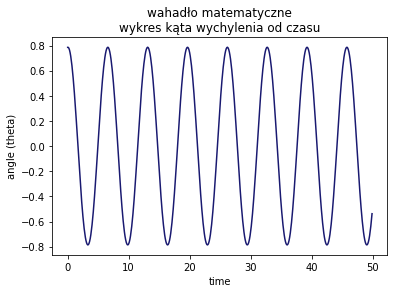

In [15]:
plot_pendulum_graph(endtime=50, timestep=0.1)

Wykres przypomina cosinusoidę, co odpowiada rozwiązaniu wyznaczonemu analitycznie.

#### animacja

Do stworzenia animacji wykorzystałem bibliotekę matplotlib.

In [16]:
def animate_pendulum(start_angle=pi/4, g=1, l=1, timestep=0.1):
    fig, ax = plt.subplots()
    plt.axis('scaled')
    ax.set_xlim(-l, l)
    ax.set_ylim(-l//5, 2*l)
    
    scat = ax.scatter([l*sin(start_angle)], [l-l*cos(start_angle)], color='slateblue', linewidth=10)
    line, = ax.plot([0, l*sin(start_angle)], [l, l-l*cos(start_angle)], color='pink', zorder=0)
    ax.scatter([0], [l], color='gray', linewidth=0.2)
    
    angle_gen = pendulum(start_angle, g=g, l=l, timestep=timestep)
    
    def update_pendulum(i):
        angle = next(angle_gen)
        scat.set_offsets([l*sin(angle), l-l*cos(angle)])
        line.set_xdata([0, l*sin(angle)])
        line.set_ydata([l, l-l*cos(angle)])
        
    return animation.FuncAnimation(fig, update_pendulum, interval=timestep*50, frames=1000)

<IPython.core.display.Javascript object>


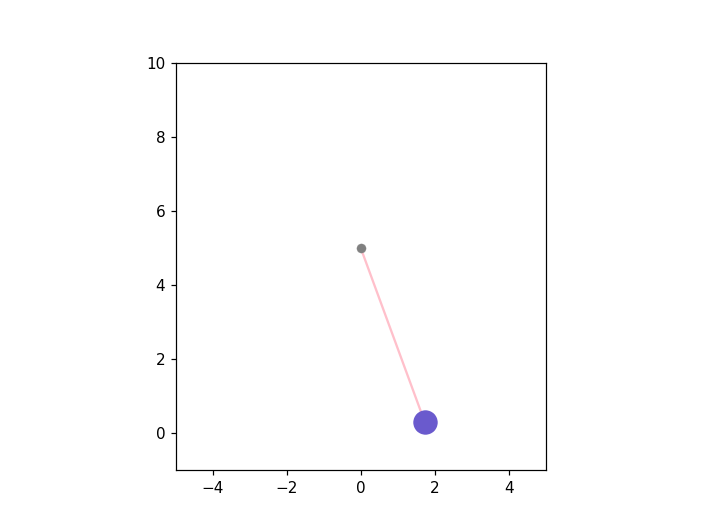

In [23]:
%matplotlib notebook
animate_pendulum(start_angle=pi/4, g=5, l=5)

<IPython.core.display.Javascript object>


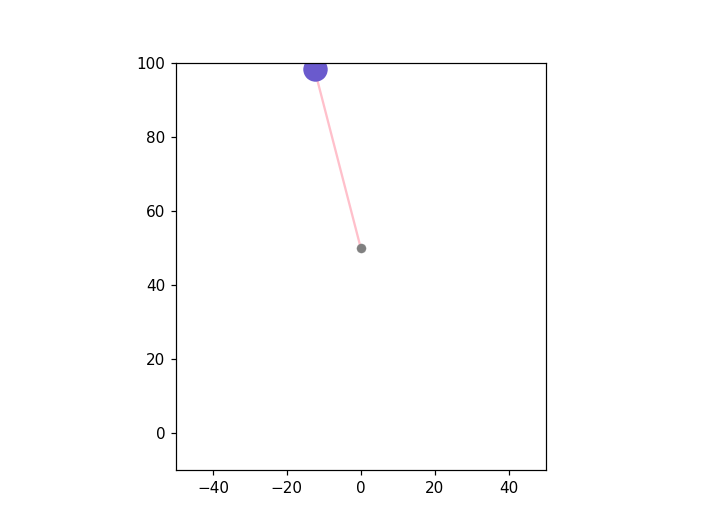

In [24]:
%matplotlib notebook
animate_pendulum(start_angle=pi-0.1, g=10, l=50)

## 3. Wahadło podwójne

<i>Zasymuluj podwójne wahadło. Stwórz animację ruchu wahadła dla różnych wartości
początkowych.</i>

Do symulacji wahadła podwójnego wykorzystałem układ czterech równań różniczkowych pierwszego rzędu ze strony https://www.myphysicslab.com/pendulum/double-pendulum-en.html z sekcji Numerical Solution.

In [19]:
def double_pendulum(start_angle1, start_angle2, m1, m2, g, l1, l2, timestep=0.1):
    theta1 = start_angle1
    theta2 = start_angle2
    
    omega1 = 0
    omega2 = 0
    
    t = 0
    
    while True:
        yield((theta1, theta2))
        
        theta1 = runge_kutta(f=lambda t, x: omega1, u0=theta1, t0=t, x=t+timestep) 
        theta2 = runge_kutta(f=lambda t, x: omega2, u0=theta2, t0=t, x=t+timestep) 
        
        omega1_prim = lambda t, omega1: (-g*(2*m1+m2)*sin(theta1) - m2*g*sin(theta1-2*theta2) - 2*sin(theta1-theta2)*m2*(omega2**2*l2 + omega1**2*l1*cos(theta1-theta2)))/(l1*(2*m1 + m2 - m2*cos(2*theta1-2*theta2)))
        omega2_prim = lambda t, omega2: (2*sin(theta1-theta2)*(omega1**2*l1*(m1+m2) + g*(m1+m2)*cos(theta1) + omega2**2*l2*m2*cos(theta1-theta2)))/(l2*(2*m1 + m2 - m2*cos(2*theta1-2*theta2)))
    
        omega1 = runge_kutta(f=omega1_prim, u0=omega1, t0=t, x=t+timestep)
        omega2 = runge_kutta(f=omega2_prim, u0=omega2, t0=t, x=t+timestep)
        
        t += timestep

#### animacja

In [20]:
def animate_double_pendulum(angle1=pi/4, angle2=pi/4, m1=50, m2=100, g=10, l1=20, l2=10, timestep=0.1):
    fig, ax = plt.subplots()
    plt.axis('scaled')
    ax.set_xlim(-l1-l1, l1+l2)
    ax.set_ylim(-l1-l2//5, 2*(l1+l2))
    
    x1 = lambda angle: l1*sin(angle)
    y1 = lambda angle: l1 + l2 - l1*cos(angle)
    
    x2 = lambda angle1, angle2: x1(angle1) - l2*sin(angle2)
    y2 = lambda angle1, angle2: y1(angle1) - l2*cos(angle2)
    
    scat1 = ax.scatter([x1(angle1)], [y1(angle1)], color='slateblue', linewidth=10)
    scat2 = ax.scatter([x2(angle1, angle2)], [y2(angle1, angle2)], color='slateblue', linewidth=10)
    line1, = ax.plot([0, x1(angle1)], [l1+l2, y1(angle1)], color='pink', zorder=0)
    line2, = ax.plot([x1(angle1), x2(angle1, angle2)], [y1(angle1), y2(angle1, angle2)], color='pink', zorder=0)
    
    angle_gen = double_pendulum(angle1, angle2, m1, m2, g, l1, l2, timestep)

    def update_pendulum(i):
        angle1, angle2 = next(angle_gen)
        
        scat1.set_offsets([x1(angle1), y1(angle1)])
        scat2.set_offsets([x2(angle1, angle2), y2(angle1, angle2)])
        line1.set_xdata([0, x1(angle1)])
        line1.set_ydata([l1+l2, y1(angle1)])
        line2.set_xdata([x1(angle1), x2(angle1, angle2)])
        line2.set_ydata([y1(angle1), y2(angle1, angle2)])
        
    return animation.FuncAnimation(fig, update_pendulum, interval=timestep*30, frames=10000)

<IPython.core.display.Javascript object>


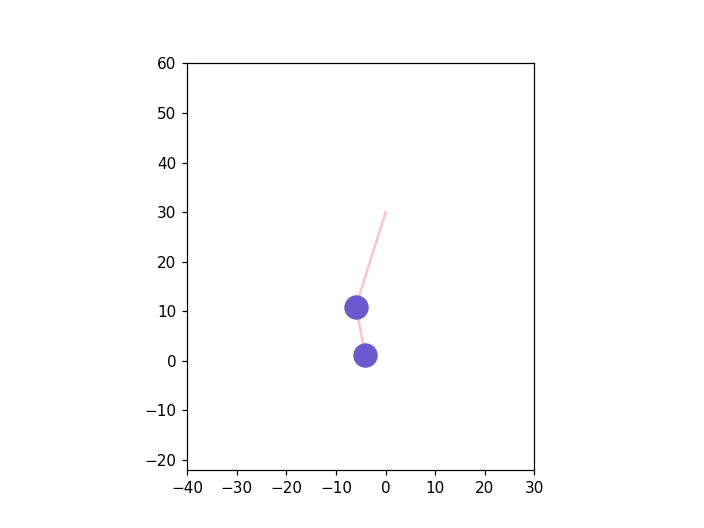

In [25]:
%matplotlib notebook
animated = animate_double_pendulum(angle1=pi/4, angle2=pi/4, m1=50, m2=100, g=10, l1=20, l2=10)

<IPython.core.display.Javascript object>


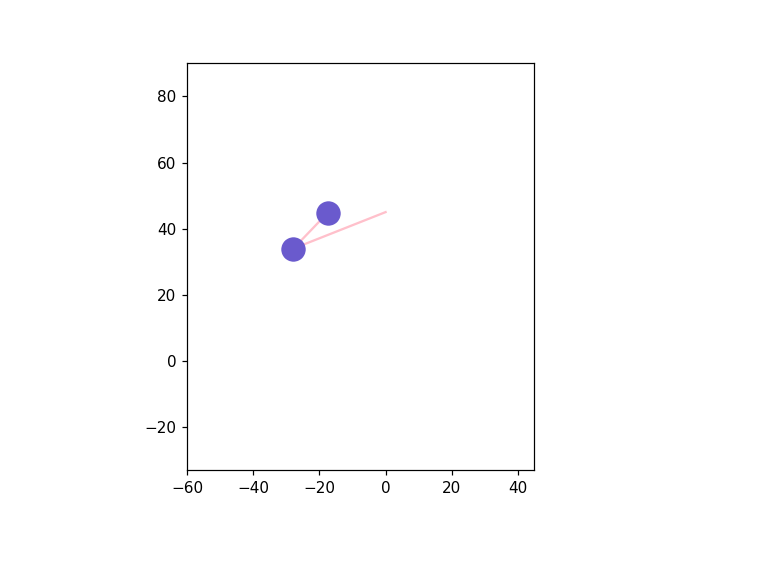

In [26]:
%matplotlib notebook
animated = animate_double_pendulum(angle1=pi-0.1, angle2=pi/9, m1=500, m2=100, g=20, l1=30, l2=15, timestep=0.01)

## Wnioski

- Metoda Eulera oraz jej uogólnienie w postaci metody Rungego-Kutty pozwalają znaleźć rozwiązanie równania różniczkowego zwyczajnego pierwszego rzędu w szybkim czasie i z dobrą dokładnością, wykorzystując kwadraturę metodą prostokątów i prostą aproksymację funkcji. 
- Na dokładność metody w największym stopniu wpływa przyjęta długość kroku czasowego.
- Zaproponowane metody można także wykorzystać do rozwiązania równań wyższych rzędów, sprowadzając je do układów równań rzędu pierwszego.

M. Hawryluk 02.06.2021